In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = 'transaction_data_clean_feature_engineering.csv'
data = pd.read_csv(file, index_col = 0)
data

,real_date,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NAME,BRAND_NAME,PACKET_SIZE,PROD_QTY,TOT_SALES
0,2018-07-01,9,9341,8808,Smiths Thinly Cut Roast Chicken 175g,Smiths,175,2,6.0
1,2018-07-01,86,86016,84237,Red Rock Deli Sp Salt & Truffle 150G,RRD,150,2,5.4
2,2018-07-01,129,129046,132474,Smith Crinkle Cut Mac N Cheese 150g,Smiths,150,2,5.2
3,2018-07-01,58,58072,53145,Pringles Sthrn FriedChicken 134g,Pringles,134,2,7.4
4,2018-07-01,97,97164,97311,WW Crinkle Cut Chicken 175g,Woolworths,175,2,3.4
...,...,...,...,...,...,...,...,...,...
246737,2019-06-30,91,91076,89519,Thins Chips Seasonedchicken 175g,Thins,175,2,6.6
246738,2019-06-30,84,84116,83704,Doritos Corn Chips Nacho Cheese 170g,Doritos,170,2,8.8
246739,2019-06-30,24,24115,20917,Smiths Crinkle Cut Chips Chs&Onion170g,Smiths,170,2,5.8
246740,2019-06-30,199,199117,198068,Doritos Corn Chips Nacho Cheese 170g,Doritos,170,2,8.8


In [4]:
data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PACKET_SIZE,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,175.585178,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,59.434727,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,70.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,150.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,170.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,175.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,380.000000,200.000000,650.000000


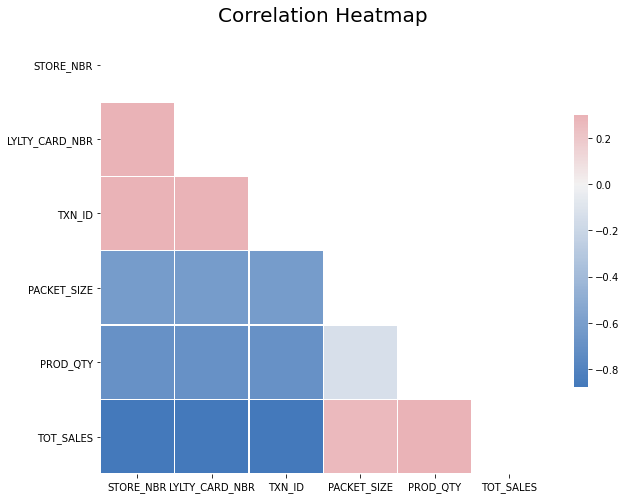

In [5]:
# Correlation
data_corr = data.corr()

corr = data_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap', fontsize = 20)

plt.show()

# Brand Insights

In [6]:
data['BRAND_NAME'].describe()

count     246742
unique        20
top       Kettle
freq       41288
Name: BRAND_NAME, dtype: object

In [7]:
brand_name_dist = dict(data['BRAND_NAME'].value_counts())
brands = pd.DataFrame.from_dict(data = brand_name_dist,columns = ['Stock Sold'], orient = 'index')
brands

,Stock Sold
Kettle,41288
Smiths,30353
Doritos,25226
Pringles,25102
RRD,16321
Infuzions,14201
Thins,14075
Woolworths,11836
Cobs,9693
Tostitos,9471


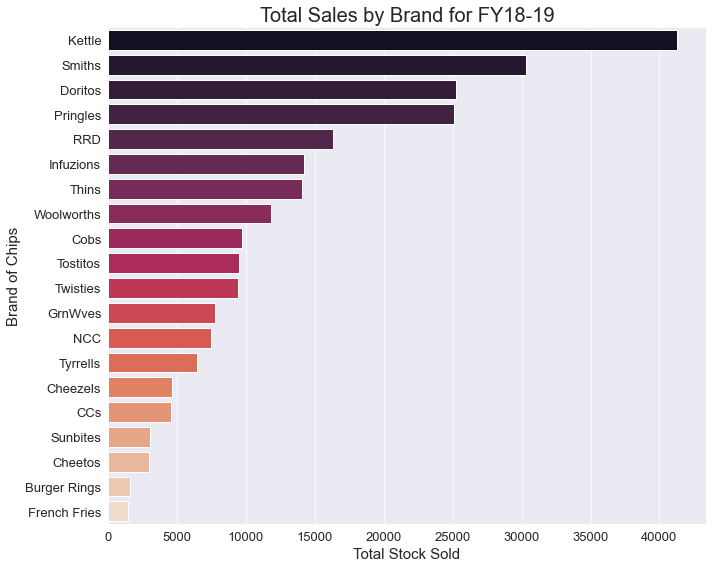

In [8]:
plt.figure(figsize = (10,8))
ax = sns.set_style('darkgrid')
ax = sns.barplot(x = brands['Stock Sold'], y = brands.index, palette = 'rocket')
ax.set_xlabel('Total Stock Sold', fontsize = 15)
ax.set_ylabel('Brand of Chips', fontsize = 15)
ax.axes.set_title('Total Sales by Brand for FY18-19', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.tight_layout()